# KNN #

## Importing packages and data ##

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic


In [2]:
df = pd.read_csv("./datasets/telecom_churn_clean.csv", index_col = 0)
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Preparing data ##

### OneHot Encoding categorical variables ###

In [30]:
df_dummies = pd.get_dummies(df[' Insert categorical variable '], drop_first = True).astype('int')
df = pd.concat([df, df_dummies], axis = 1)
df = df.drop(' Insert categorical variable ', axis = 1)

### Separating X and y ###

In [3]:
X = df.drop('churn', axis = 1).values
y = df['churn'].values

### Separating train and test samples ###

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

## One model ##

### Instantiating the model ###

In [6]:
knn = KNeighborsClassifier(n_neighbors = 6)

### Fitting the model ###

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

### Evaluating the model ###

In [10]:
test_score = knn.score(X_test, y_test)
print('Test Set Accuracy: {}'.format(test_score))

Test Set Accuracy: 0.8725637181409296


In [18]:
y_pred = knn.predict(X_test)

In [19]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[563   6]
 [ 79  19]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.8488293166849412, 0.9861679580075786),
  ('0', '1'): (0.0,
   0.9894902171437912,
   0.8488293166849412,
   0.010509782856208688),
  ('1', '0'): (0.8538044410630508,
   0.0,
   0.1461955589369494,
   0.8034443013085633),
  ('1', '1'): (0.8538044410630508,
   0.8067665604447758,
   0.1461955589369494,
   0.19323343955522407)})

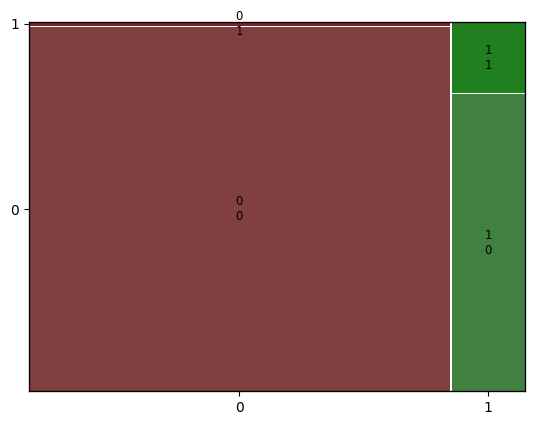

In [23]:
mosaic(conf_mat)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       569
           1       0.76      0.19      0.31        98

    accuracy                           0.87       667
   macro avg       0.82      0.59      0.62       667
weighted avg       0.86      0.87      0.84       667



## Multi model ##

In [51]:
train_accuracies = {}
test_accuracies = {}
test_recall = {}
neighbors = np.arange(1,26)

In [52]:
for neighbor in neighbors :
					knn = KNeighborsClassifier(n_neighbors = neighbor, weights = 'distance')
					knn.fit(X_train, y_train)
					train_accuracies[neighbor] = knn.score(X_train, y_train)
					test_accuracies[neighbor] = knn.score(X_test, y_test)
					y_pred = knn.predict(X_test)
					test_recall[neighbor] = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


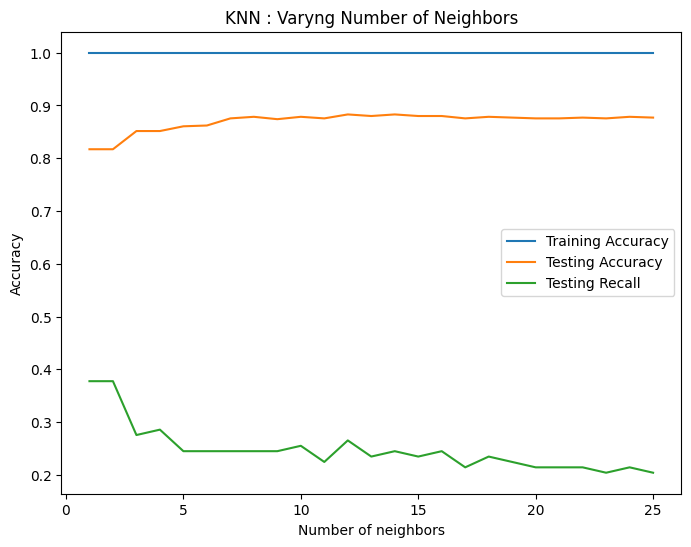

In [53]:
plt.figure(figsize=(8, 6))
plt.title("KNN : Varyng Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Testing Accuracy')
plt.plot(neighbors, test_recall.values(), label = 'Testing Recall')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [33]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 483), (1, 483)]


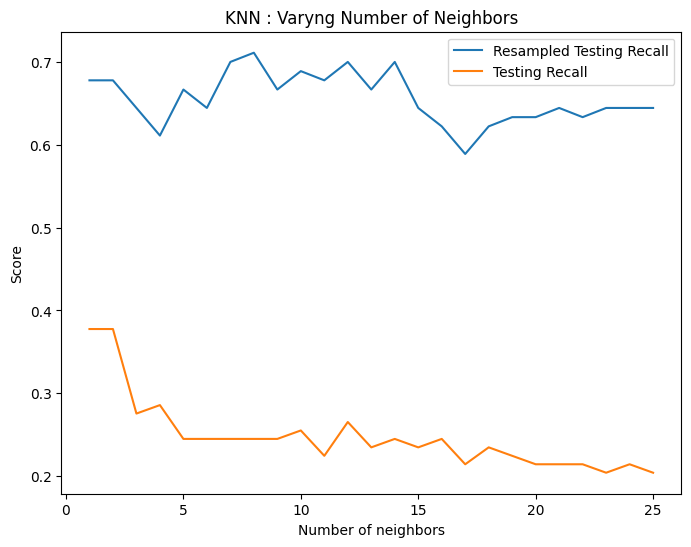

In [56]:
X_rs_train, X_rs_test, y_rs_train, y_rs_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 11)
train_rs_accuracies = {}
test_rs_accuracies = {}
test_rs_recall = {}
neighbors = np.arange(1,26)
for neighbor in neighbors :
					knn = KNeighborsClassifier(n_neighbors = neighbor, weights = 'distance')
					knn.fit(X_rs_train, y_rs_train)
					train_rs_accuracies[neighbor] = knn.score(X_rs_train, y_rs_train)
					test_rs_accuracies[neighbor] = knn.score(X_rs_test, y_rs_test)
					y_rs_pred = knn.predict(X_rs_test)
					test_rs_recall[neighbor] = classification_report(y_rs_test, y_rs_pred, output_dict=True)['1']['recall']
plt.figure(figsize=(8, 6))
plt.title("KNN : Varyng Number of Neighbors")
#plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
#plt.plot(neighbors, test_accuracies.values(), label = 'Testing Accuracy')
#plt.plot(neighbors, train_rs_accuracies.values(), label = 'Resampled Training Accuracy')
#plt.plot(neighbors, test_rs_accuracies.values(), label = 'Resampled Testing Accuracy')
plt.plot(neighbors, test_rs_recall.values(), label = 'Resampled Testing Recall')
plt.plot(neighbors, test_recall.values(), label = 'Testing Recall')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.show()

In [48]:
print(classification_report(y_test, y_pred, output_dict=True)['1']['recall'])


0.19387755102040816


In [ ]:
y_rs_pred = 